# Приоритизация гипотез и анализ результатов A/B-тестов  для увеличения выручки. 

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


# План:

    1) Анализ общей информации о данных
    2) Предобработка данных
    3) Приоритизация гипотез.
        - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
        - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
        - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
    4) Анализ A/B-теста
        - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
        - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
        - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и                       предположения.
        - Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
        - Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и                           предположения.
        - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
        - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных                пользователей.
        - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
        - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
        - Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и                      предположения.
        - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте      выводы и предположения.
        - Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и                  предположения.
        - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
        - Примите решение по результатам теста и объясните его. Варианты решений:
            1. Остановить тест, зафиксировать победу одной из групп.
            2. Остановить тест, зафиксировать отсутствие различий между группами.
            3. Продолжить тест.

## Общая информация о данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats

pd.options.display.max_colwidth = 130

In [2]:
# прочитаем файлы:

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Изучим данные таблиц.

In [3]:
# небольшая функция, которой обычно пользуюсь...

def df_info(df_name):
    display(df_name.head(10))
    display(df_name.info())
    display(df_name.duplicated().sum())

In [4]:
df_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

0

Пропусков не наблюдается, типы данных так же в порядке, дубликатов нет. Оданако, нужно будет привести названия столбцов к нижнему регистру.

In [5]:
df_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0

Здесь, в целомтоже все в порядке, кроме столбца даты - его преобразуем в нужный тип. А названия столбцов transactionId и visitorId так же поменяем. transactionId изучим поподробнее на дубликаты.

In [6]:
df_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

0

Здесь проблема только в типе данных даты.

**Вывод:**

Данные находятся в хорошем состоянии, однако некоторые ньюансы по типам дат и названиям столбцов имеются. Будем исправлять..

## Предобработка данных

Сначала займемся датасетом hypothesis, приведем названия столбцов к нижнему регистру.

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


В данных orders заменим тип столбца date, поменяем названия двух столбцов и проверим на дубликаты колокну transactionId. Еще можно поспотреть наличие неявных дубликатов в столбце group.

In [8]:
orders['date'] = pd.to_datetime(orders['date'],format='%Y-%m-%d')
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
print(orders['transaction_id'].duplicated().sum())
print(orders['group'].unique())
print(orders.info())
orders.head()

0
['B' 'A']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В бд visitors заменим дату преобразуем в нужный тип и, опять же, проверим колонку group на наличие неявных дубликатов.

In [9]:
visitors['date'] = pd.to_datetime(visitors['date'],format='%Y-%m-%d')
print(visitors['group'].unique())
print(visitors.info())
visitors.head()

['A' 'B']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Вывод:**

Провели все нужные нам преобразовние со всеми датасетами, а так же проверили данные на наличие неявных дубликатов, которые не обнаружили

## Часть 1. Приоритизация гипотез.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [10]:
hypothesis_ice = hypothesis.copy()
hypothesis_ice['ICE'] = (hypothesis_ice['impact'] * hypothesis_ice['confidence']) / hypothesis_ice['efforts']
hypothesis_ice['ICE'] = hypothesis_ice['ICE'].round(2)
hypothesis_ice = hypothesis_ice.sort_values(by='ICE', ascending=False)
hypothesis_ice

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [11]:
hypothesis_rice = hypothesis.copy()
hypothesis_rice['RICE'] = (hypothesis_rice['reach'] * hypothesis_rice['impact'] * hypothesis_rice['confidence']) / hypothesis_rice['efforts']
hypothesis_rice['RICE'] = hypothesis_rice['RICE'].round(2)
hypothesis_rice = hypothesis_rice.sort_values(by='RICE', ascending=False)
hypothesis_rice

,hypothesis,reach,impact,confidence,efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


**Выводы:**

Следующие гипотизы оказались самыми приоритетными при использовании фреймворка ICE: "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". При использовании фреймворка RICE наиболее приоритетные гипотезы - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

Результаты несколько отличаются из за того, что ICE не учитывает оценку количества пользователей, которых затронут изменения, а RICE - учитывает. Соответсвенно чем пользователей больше, тем приоритет гипотезы выше.

Тем не менее гипотезы с индексами 7 и 0 в обоих случаях можно выделить приоритетными. 

## Часть 2. Анализ A/B-теста

Для начала подготовим данные для последующей работы.

У нас нет никаких данных, которые бы указывали, как пользователи делелились на  группы. Может быть такое, что пользователи попали в обе группы, что не есть хорошо. Проверим как у нас с эти дела.

In [12]:
visitor_a = orders.query('group == "A"') 
visitor_b = orders.query('group == "B"') 
  
visitor_intersections = list(np.intersect1d(visitor_a['visitor_id'], visitor_b['visitor_id']))

print('Дублирующиеся пользователи:', round((len(visitor_intersections) / orders['visitor_id'].count() * 100), 2), '%')

Дублирующиеся пользователи: 4.85 %


Итого, 4.85% дублирующихся пользователей которые могут исказить дальнейшие исследования, поэтому удалим записи о покупках этих пользователей.

In [13]:
orders = orders.query('visitor_id not in @visitor_intersections')

Создадим массив уникальных пар значений дат и групп теста.

In [14]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups. Проагрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков. Применим методы к каждой строке датафрейма и отсортируем результаты по столбцам 'date' и 'group'.

In [15]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [16]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов.

In [17]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

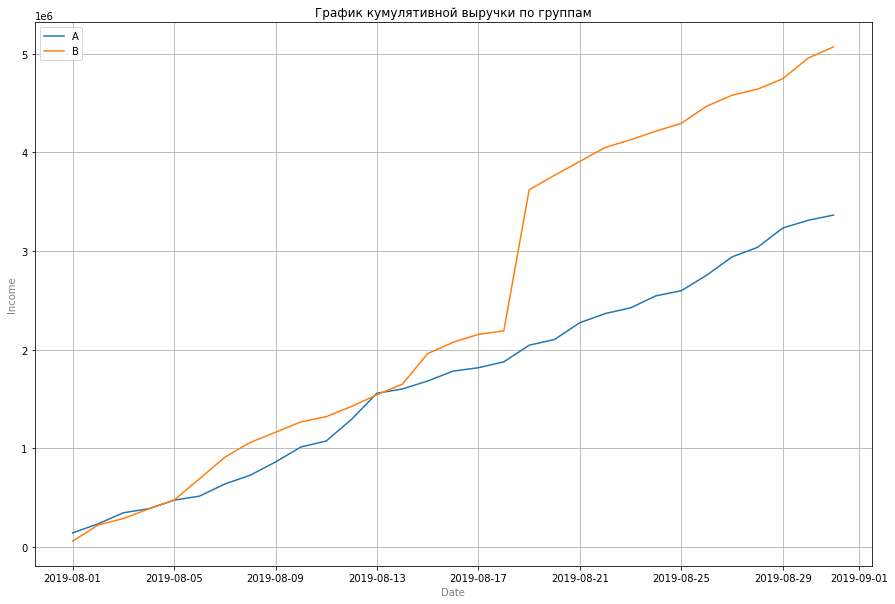

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Увеличиваем размер всех графиков Matplotlib:
plt.rcParams ['figure.figsize'] = [15, 10]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(loc=2)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Date', color='gray')
plt.ylabel('Income',color='gray')
plt.grid(True)
plt.show()

Вначале выручка почти равномерно увеличивается, однако графики выручки группы B после 17.08 резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

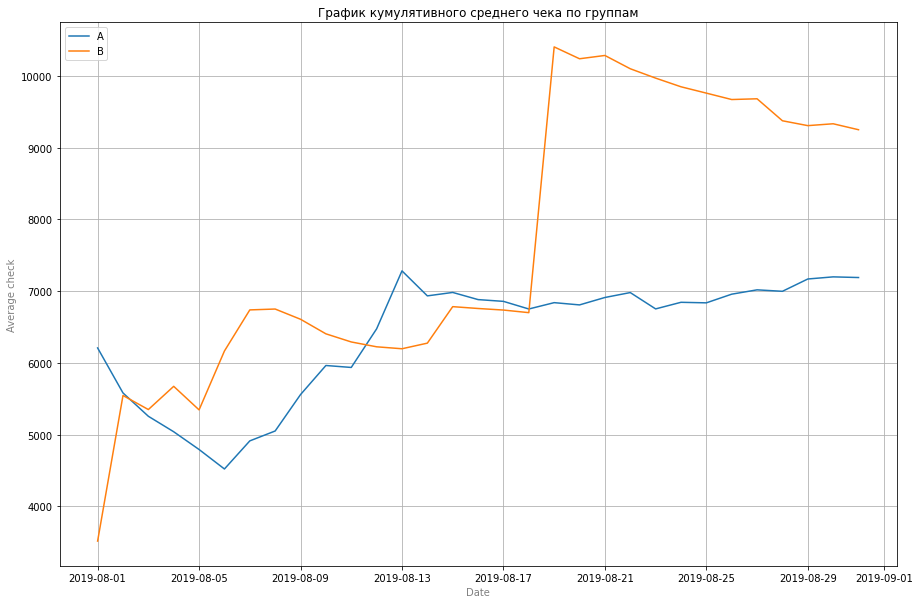

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend(loc=2)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Date', color='gray')
plt.ylabel('Average check',color='gray')
plt.grid(True)
plt.show()

Средний чек сильно колеблется вначале, график группа А к середине теста становится более равномерным, но средний чек группы В продолжает колебаться. Возможно, резкий всплеск на графике означает, что в группу B попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

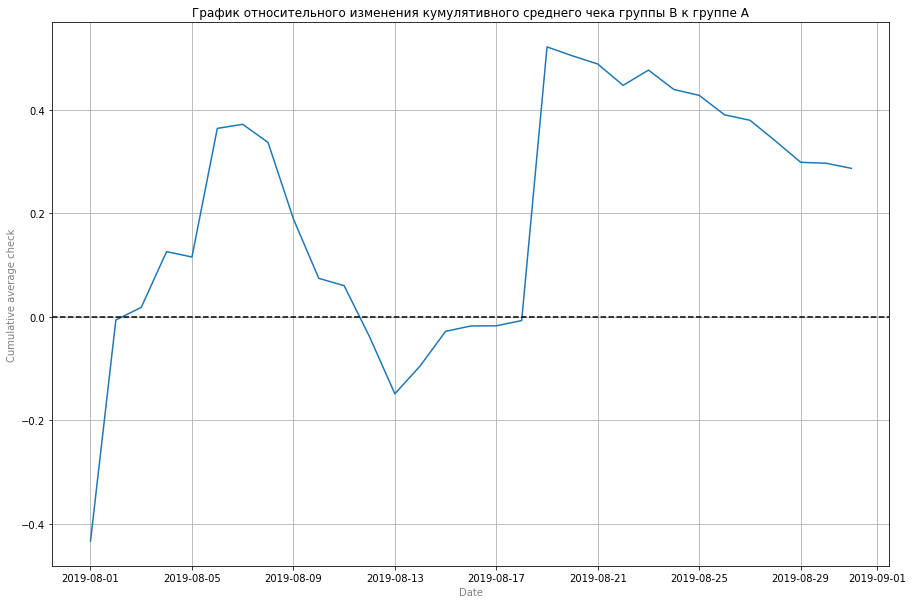

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Date', color='gray')
plt.ylabel('Сumulative average check',color='gray')
plt.grid(True)
plt.show()

В нескольких точках график различия между сегментами резко «скачет», что свидетельствует о крупных заказах и выбросах! 

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


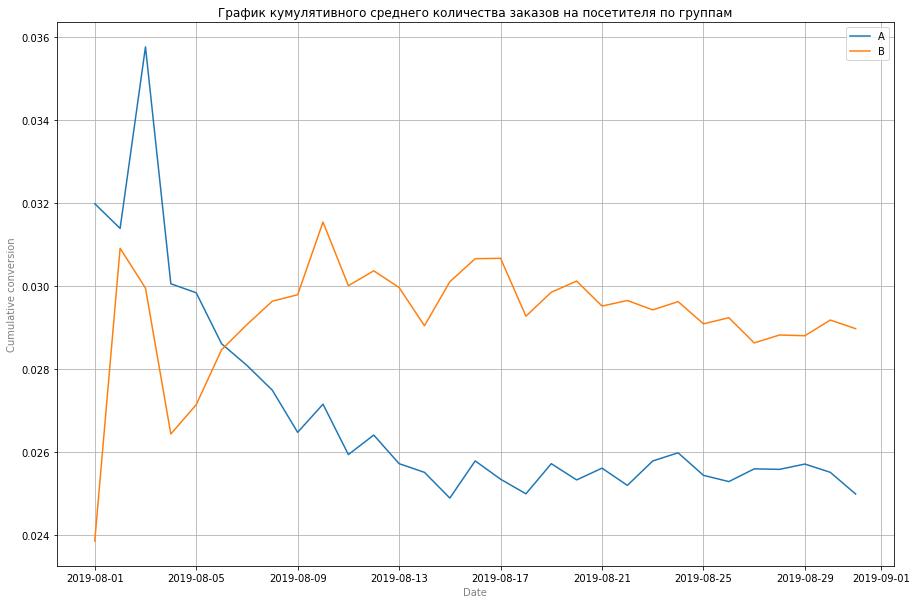

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Date', color='gray')
plt.ylabel('Cumulative conversion',color='gray')
plt.grid(True)
plt.show()

Конверсия группы А была больше группы B. Однако, очень скоро конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась. Конверсия группы В выше, чем в группе А ,2.9% и 2.5% соответственно.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

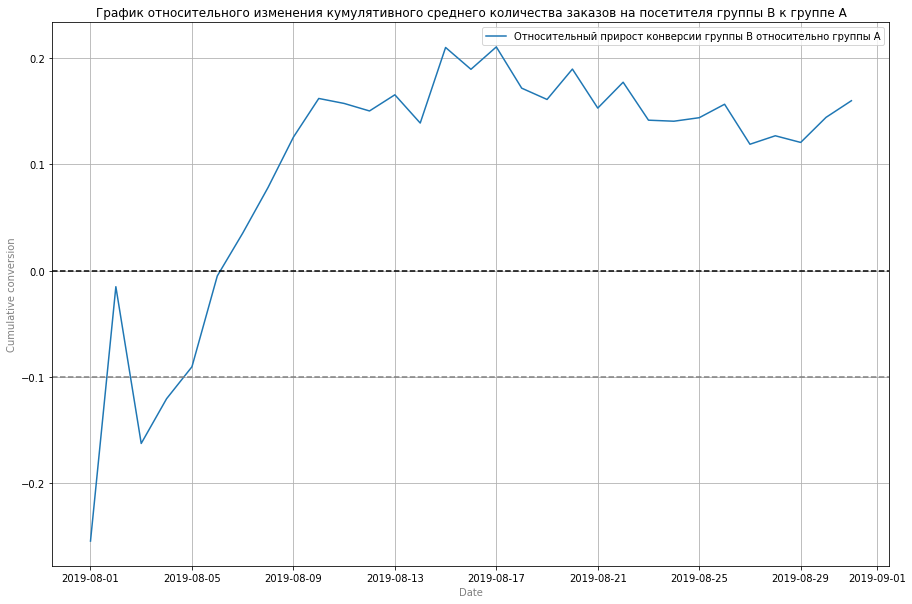

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.legend()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Date', color='gray')
plt.ylabel('Cumulative conversion',color='gray')
plt.grid(True)
plt.show()

В начале теста группа B группе A, затем вырвалась вперёд. Её конверсия постепено росла, но поотом начала колебаться около одного значения. Пока группа В выглядит интересней.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

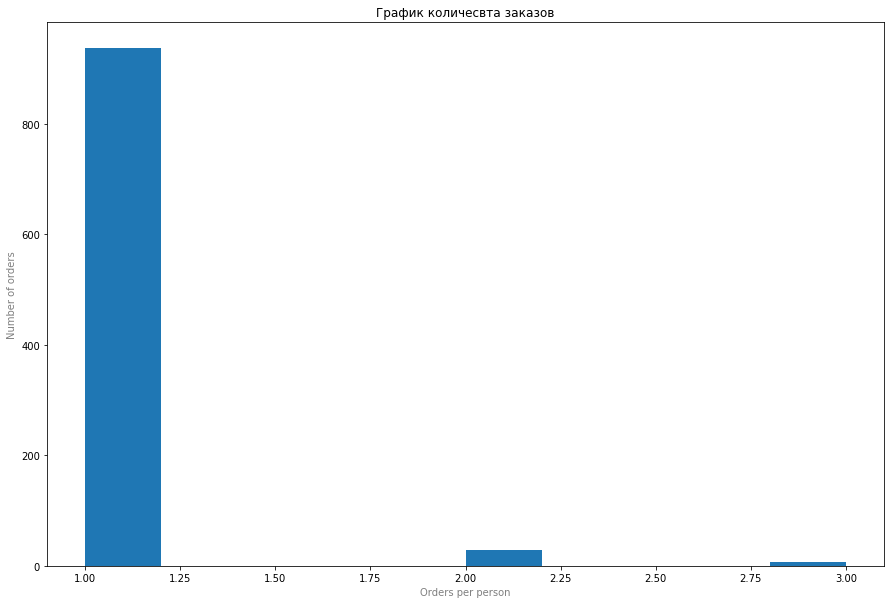

array([1, 3, 2])

In [24]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

plt.hist(ordersByUsers['orders']) 

plt.title('График количесвта заказов')
plt.xlabel('Orders per person', color='gray')
plt.ylabel('Number of orders',color='gray')
plt.show()

ordersByUsers['orders'].unique()

Большинство покупателей заказывали только один раз. Доля пользователей с 2 и 3 заказами значительно меньше. Выбросов не наблюдается.

Построим точечную диаграмму числа заказов на одного пользователя: 

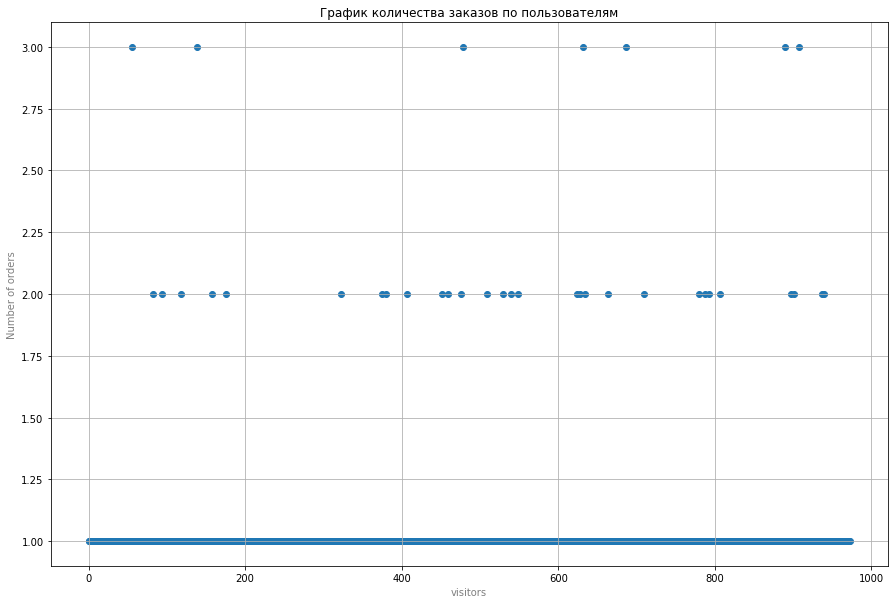

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 


plt.title('График количества заказов по пользователям')
plt.xlabel('visitors', color='gray')
plt.ylabel('Number of orders',color='gray')
plt.grid(True)
plt.show()

Выводы подтверждаются: большинсвто пользователей с 1 заказом. 

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Для количества заказов на одного пользователя 95 и 99 перцентили оказались равными 1 и 2 заказа на пользователя соответственно. Пологаю, что для удаления аномалий 2 заказа можно взять за нижнюю границу для значений количества заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

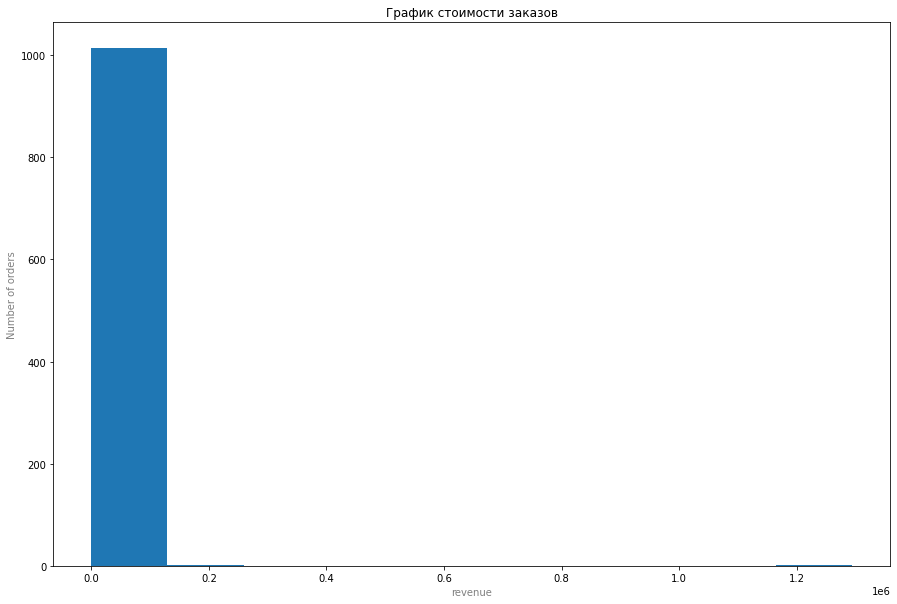

In [27]:
plt.hist(orders['revenue']) 

plt.title('График стоимости заказов')
plt.xlabel('revenue', color='gray')
plt.ylabel('Number of orders',color='gray')
plt.show()

Наблюдаем аномальные значения.

In [28]:
orders['revenue'].sort_values()

459          50
584          50
756          50
933          60
404          70
         ...   
743       67990
744       86620
1136      92550
1196     202740
425     1294500
Name: revenue, Length: 1016, dtype: int64

Уберем два значения с слишком большой ценой при построении графика.

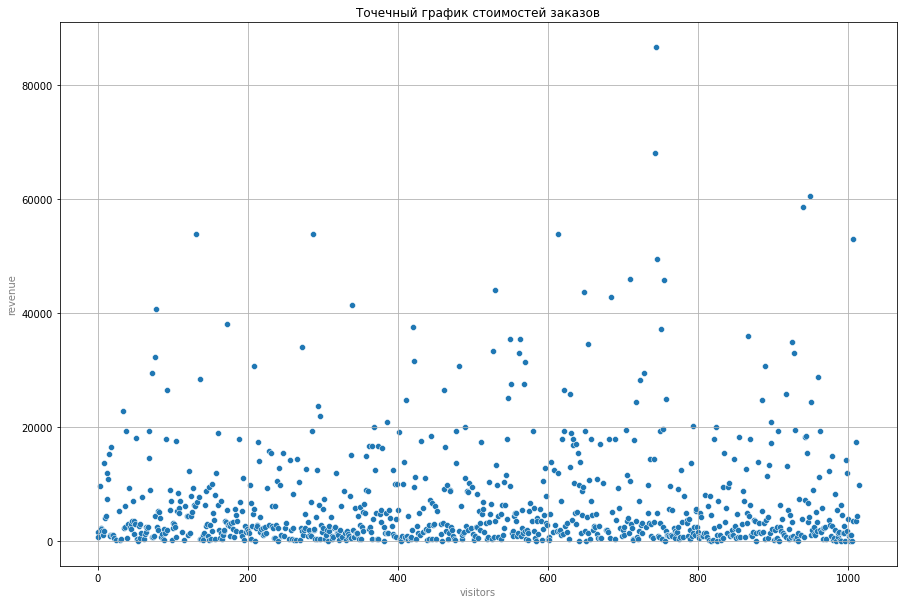

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))

sns.scatterplot(data=orders, x=x_values, y=orders.query('revenue < 202740')['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('visitors', color='gray')
plt.ylabel('revenue',color='gray')
plt.grid(True)
plt.show()

Всё, как предполагали: есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между от 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. Для того, чтобы точно определить стоимость заказа, необходимо посчитать выборочные перцентели.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей. Берем границу аломальных заказов от 26785 рублей.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Начнём с подготовки данных

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Зададим статистические гипотизы:    
    
    H0: Количество заказов групп A и B равны, статистически значимых отличий нет.
    H1: Количество заказов A и B различны, статистически значимые отличия есть.

Создадим переменные ordersByUsersA и ordersByUsersB, в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if (sampleB.mean() / sampleA.mean() - 1) > 0:
    print('Различие в средних в пользу группы В:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
else:
    print('Различие в средних в пользу группы A:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Различие в средних в пользу группы В: 0.160


При alpha=0.05 - P-value меньше, значит - наблюдаеются статистически значимые отличия между группами, нулевую гипотизу отвергаем.
При этом относительное различие в среднес числе заказов между группами составляет почти 16%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Зададим статистические гипотизы:

    H0: Средние чеки групп A и B равны, статистически значимых отличий нет. 
    H1: Средние чеки групп A и B различны, статистически значимые отличия есть.

In [33]:
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1) > 0:
    print('Различие в средних в пользу группы В:', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
else:
    print('Различие в средних в пользу группы A:', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Различие в средних в пользу группы В: 0.287


При alpha=0.05 - P-value значительно больше. Нулевую гипотизу принимаем, нет статистически значимых различий между группами в размере среднего чека. Средний чек группы B значительно выше среднего чека группы А на 28.7%.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 20 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 20 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
58


Всего 58 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:


In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Зададим статистические гипотизы:

    H0: Количество заказов групп A и B равны, статистически значимых отличий нет.
    H1: Количество заказов A и B различны, статистически значимые отличия есть.

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [36]:
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
if (sampleBFiltered.mean()/sampleAFiltered.mean()-1) > 0:
    print('Различие в средних в пользу группы В:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
else:
    print('Различие в средних в пользу группы A:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.012
Различие в средних в пользу группы В: 0.182


Конверсия почти не изменились, результаты по среднему количеству заказов практически так же, значит - нулевую гипотизу отвергаем. Произошло ли что-нибудь с результатами по среднему чеку?

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Зададим статистические гипотизы:

    H0: Средние чеки групп A и B равны, статистически значимых отличий нет. 
    H1: Средние чеки групп A и B различны, статистически значимые отличия есть.

In [37]:
print( 'P-value:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

if (orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1) > 0:
    print('Различие в средних в пользу группы A:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
else:
    print('Различие в средних в пользу группы A:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 



P-value:0.646
Различие в средних в пользу группы A: -0.048


P-value уменьшился, но и разница между сегментами не просто сократилась, а теперь лидирует группа А, однако нулевая гипотиза все еще принимается. Аномалии сильно повлияли на результаты A/B-теста.

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Относительный выигрыш группы B над A равен 18,2% по "очищенным" и 16.0% по "сырым" данным.

Средний чек группы B оказался на 4,8% ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше 28.7%, что было связвно с выбросами значений.

Пологаю, что нужно принять решение остановить тестирование и признать победу группы B т.к. группа B значительно лучше  группы A по в среднеиу числу заказов, а по среднему чеку группы примерно равны.